In [1]:
import nltk
import re
import wikipedia
import numpy as np
import pandas as pd

In [2]:
#nltk.download()
#nltk.download('wordnet')

In [3]:
print(wikipedia.search("bill",results=2))

['Bill', 'Bill.com']


In [4]:
def getwiki_paragraph(title):
    page=wikipedia.page(title)
    return page.content

In [5]:
text_data=getwiki_paragraph("indian people")

In [6]:
text_data[:200]

'Indians are the nationals and citizens of India, the second most populous nation in the world, containing 17.50% of the world\'s population. In India, the term "Indian" refers to nationality, rather th'

In [7]:
list_char=text_data.split(" ")

In [8]:
len(list_char)

4150

In [9]:
unique_char=set(list_char)

In [10]:
len(unique_char)

1725

In [11]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [12]:
sent_token=sent_tokenize(text_data)

In [13]:
len(sent_token)

150

In [14]:
word_token=word_tokenize(text_data)

In [15]:
len(word_token)

4826

In [16]:
from nltk.probability import FreqDist

In [17]:
freqdist=FreqDist(word_token)

In [18]:
#freqdist

In [19]:
#freqdist.most_common(10)

In [20]:
import matplotlib.pyplot as plt

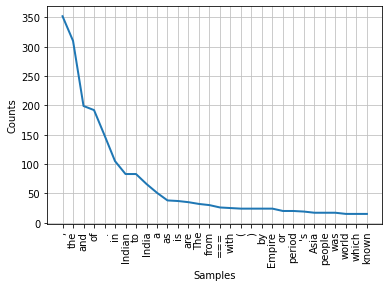

In [21]:
freqdist.plot(30)
plt.show()

In [22]:
import string

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
text_p="".join([char for char in text_data if char not in string.punctuation])

In [25]:
#text_p

In [26]:
text_p=re.sub(r'\d+'," ",text_p)
#text_p
text_p=text_p.lower()

In [27]:
word_token_p=word_tokenize(text_p)

In [28]:
freqDist_p=FreqDist(word_token_p)

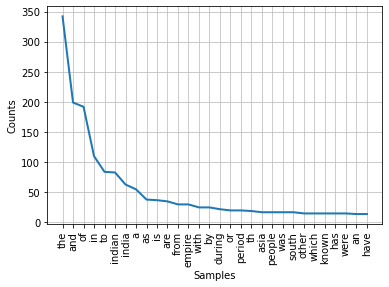

In [29]:
freqDist_p.plot(30)
plt.show()

In [30]:
from nltk.corpus import stopwords

In [31]:
pre_stop_list=stopwords.words('english')

In [32]:
len(pre_stop_list)

179

In [33]:
filter_list=[word for word in word_token_p if word not in pre_stop_list]

In [34]:
#filter_list

In [35]:
freq_dist_stop=FreqDist(filter_list)

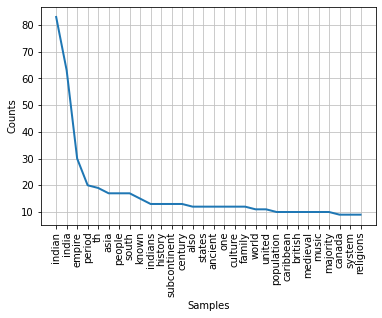

In [36]:
freq_dist_stop.plot(30)
plt.show()

In [37]:
from nltk.stem import PorterStemmer

In [38]:
ps=PorterStemmer()
ps.stem("running")

'run'

In [44]:
from nltk.stem import WordNetLemmatizer

In [40]:
sentence="it is good to be pythoner who is pythonly pythoning with python"

In [41]:
words=nltk.word_tokenize(sentence)

In [43]:
for word in words:
    ps=PorterStemmer()
    #print(ps.stem(word))

In [48]:
lema_w=WordNetLemmatizer()

In [52]:
lema_w.lemmatize('better',pos='a')

'good'

In [54]:
lema_w.lemmatize('driven',pos='v')

'drive'

In [56]:
tag=nltk.pos_tag(filter_list)
#print(tag)

In [57]:
grammer="NP:{<DT>?<JJ>*<NN>}"

In [58]:
cp=nltk.RegexpParser(grammer)
result=cp.parse(tag)

In [60]:
#result.draw()

In [61]:
from PIL import Image
import sys 
from os import path

In [63]:
from wordcloud import WordCloud,STOPWORDS

In [66]:
word_cloud=WordCloud(collocations=False,background_color='white').generate(text_p)

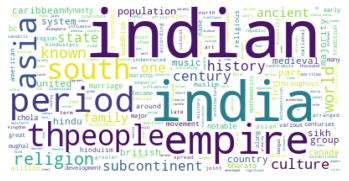

In [70]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()